## Regression - Predicting continuous values

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## create a regression dataset 

In [3]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=5000, n_features=30, n_informative=25, noise=10, random_state=42)

In [4]:
X

array([[-1.05245683, -0.94496269, -1.79989659, ..., -1.83442393,
        -0.07956011,  1.20745263],
       [-0.84747383,  0.31840811,  0.24796167, ..., -0.2390554 ,
        -0.69763862,  1.31984005],
       [-0.94602775,  0.2383774 , -1.6176638 , ..., -0.09142036,
        -0.74652074, -2.21823553],
       ...,
       [-0.22097737,  1.14453288, -0.39354952, ..., -0.90184457,
        -0.07424546, -0.2463316 ],
       [-0.95614616,  0.03256098, -1.12885675, ..., -0.00963513,
        -1.43734832,  0.63541106],
       [ 1.51114116, -0.00270833, -1.26097476, ..., -0.15650465,
         0.50981791,  1.19398227]])

## Save X and Y in Dataframe 

In [5]:
cols = [f'x{i+1}' for i in range(30)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [6]:
import pandas as pd 
X = pd.DataFrame(X, columns = cols)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.052457,-0.944963,-1.799897,-0.034799,-1.482409,1.613543,-0.748163,-0.645310,1.063117,-1.335465,...,-0.398323,0.326932,2.042239,-0.301699,-1.361063,1.454857,-0.066823,-1.834424,-0.079560,1.207453
1,-0.847474,0.318408,0.247962,0.176165,0.550274,-0.695864,0.599538,-0.050914,1.363157,-1.201647,...,-1.368967,-0.403174,0.125837,-1.231097,-0.042579,-0.293594,-0.505876,-0.239055,-0.697639,1.319840
2,-0.946028,0.238377,-1.617664,-2.253756,-1.057629,-0.011553,1.400647,0.990803,-0.262228,-0.396235,...,-0.400736,0.007432,0.219753,2.205187,0.746020,-0.175596,-1.132978,-0.091420,-0.746521,-2.218236
3,-0.365222,0.004347,1.459301,1.650519,-3.114990,0.718841,1.669763,0.594568,0.350614,-0.528732,...,0.587610,0.050495,0.692244,0.492412,-0.118160,0.151945,-0.299890,1.009559,-0.779756,1.105541
4,-0.937119,0.038862,0.267291,-2.321520,-0.519995,1.281711,-0.447109,1.847404,-0.179080,0.073799,...,-0.985717,0.734585,-0.870311,0.316585,0.373045,-0.594102,-1.388615,1.262913,-0.668793,-0.049186


In [7]:
Y = pd.DataFrame(Y , columns = ['Y'])

In [8]:
Y

,Y
0,-232.936393
1,-144.450633
2,-30.671098
3,165.764197
4,-252.068764
...,...
4995,337.924300
4996,587.266360
4997,143.296864
4998,-248.329888


## Create a preprocessing Pipeline for X 

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [11]:
X_pre = num_pipe.fit_transform(X)

In [12]:
X_pre

array([[-1.00877542, -0.96849615, -1.8356222 , ..., -1.84743596,
        -0.06441693,  1.19633814],
       [-0.80656544,  0.30321775,  0.22782616, ..., -0.25077076,
        -0.67948802,  1.30863615],
       [-0.90378611,  0.22265853, -1.6520021 , ..., -0.10301574,
        -0.72813229, -2.22662492],
       ...,
       [-0.1885443 ,  1.13479811, -0.41856878, ..., -0.91409862,
        -0.05912814, -0.25628963],
       [-0.91376764,  0.01548293, -1.15947382, ..., -0.02116403,
        -1.41559849,  0.62475162],
       [ 1.52014196, -0.02001929, -1.29259762, ..., -0.16815292,
         0.52209333,  1.18287849]])

In [13]:
cols = num_pipe.get_feature_names_out()

In [14]:
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30'], dtype=object)

In [15]:
X_pre  = pd.DataFrame(X_pre, columns = cols)

In [18]:
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.008775,-0.968496,-1.835622,-0.032196,-1.485420,1.614947,-0.747164,-0.627734,1.038359,-1.340893,...,-0.418507,0.322752,2.071710,-0.324901,-1.342910,1.406812,-0.052268,-1.847436,-0.064417,1.196338
1,-0.806565,0.303218,0.227826,0.179320,0.577043,-0.684461,0.585446,-0.053781,1.334905,-1.205877,...,-1.393646,-0.402106,0.132047,-1.271369,-0.027103,-0.319448,-0.496045,-0.250771,-0.679488,1.308636
2,-0.903786,0.222659,-1.652002,-2.256956,-1.054417,-0.003112,1.377584,0.952108,-0.271556,-0.393252,...,-0.420931,0.005548,0.227103,2.228029,0.759895,-0.202948,-1.129894,-0.103016,-0.728132,-2.226625
3,-0.330838,-0.012918,1.448387,1.657530,-3.141920,0.724120,1.643688,0.569500,0.334151,-0.526935,...,0.571991,0.048302,0.705328,0.483796,-0.102530,0.120436,-0.287843,0.998859,-0.761205,1.094508
4,-0.894998,0.021825,0.247303,-2.324897,-0.508906,1.284552,-0.449481,1.779248,-0.189376,0.080993,...,-1.008621,0.727476,-0.876193,0.304739,0.387677,-0.616143,-1.388281,1.252419,-0.650783,-0.059300


## Train Test Split 

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [20]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
4227,0.274306,-2.243030,0.307393,2.279325,-0.849919,-0.499417,0.063387,0.322236,-0.279113,-1.485297,...,-0.435550,0.016456,-0.478773,0.826978,0.348374,0.203044,-0.974020,1.133163,0.644459,1.026561
4676,-0.110889,-2.308274,-0.306657,-2.797217,0.744218,-1.215240,0.092720,-0.881949,0.099739,-0.153516,...,0.684150,-0.050237,0.659385,0.950390,-2.264741,-0.934321,-0.207092,-1.429908,0.477449,-0.143864
800,-0.534724,0.341340,-0.318392,1.233363,1.778518,0.298750,0.083038,0.104657,0.121582,1.150535,...,2.105502,0.100787,0.150310,0.796843,0.088543,1.044029,-0.691462,0.027791,-0.467562,1.088671
3671,-0.366200,1.081039,-0.920495,-1.060692,-0.616689,0.923926,1.178280,-2.049797,-0.133985,-1.437462,...,0.375930,0.799287,-1.524107,-0.213573,1.841831,-0.235666,-1.623648,0.003545,2.453793,-0.826658
4193,-0.834782,1.471498,-1.414701,-0.704299,2.131088,-0.208189,0.823199,0.547557,0.462746,-1.556602,...,-1.605144,0.394171,0.414800,0.015313,-1.559552,0.776827,-1.919909,1.235952,-1.425568,0.749621


In [21]:
ytrain.head()

,Y
4227,421.295025
4676,-469.452726
800,42.172815
3671,114.083914
4193,-217.535707


In [23]:
xtest.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
1501,0.523841,0.380018,1.397668,1.832757,-0.050539,-0.370155,-0.415394,-1.015830,-0.468665,1.118904,...,-1.087076,0.280815,1.197157,-0.330182,-0.384110,0.456972,0.408793,0.229924,0.065080,-0.460325
2586,0.427962,0.736934,-1.337873,-0.286005,1.022151,-1.001614,1.835519,-1.545811,0.770498,0.293343,...,-0.316910,0.912012,-0.200186,0.895191,-1.340780,-0.398981,-1.299802,-1.160043,0.238474,-0.353788
2653,-1.237790,0.022987,0.591727,0.153331,-1.080162,0.695919,-0.224618,-1.372016,-0.465166,2.577988,...,0.420588,-0.927035,-1.260994,-0.041976,0.559996,-0.025339,0.715960,-2.211627,-0.158048,0.088334
1055,1.163302,0.829281,-0.052936,0.871349,0.526932,-0.469475,0.681055,2.525169,0.805937,-0.311984,...,-0.363881,-1.270352,-0.114835,-0.838927,0.522602,0.531030,-0.113249,-0.130759,-1.530358,0.355058
705,-0.916867,-0.873641,0.964425,-3.404521,-0.352093,0.141089,0.059867,-0.401822,0.274345,1.985234,...,-0.846910,1.259358,-0.624477,0.947502,0.249482,-0.340038,-0.624088,0.983280,1.321964,0.613101


In [24]:
ytest.head()

,Y
1501,297.782677
2586,-55.418700
2653,-181.896454
1055,210.251382
705,188.412050


## Create a neural network  with keras 

In [26]:
from keras.models import Sequential
from keras.layers import Dense 

In [27]:
# Initalize Sequential model
model = Sequential()

# Hidden Layer 1
model.add(Dense(64, activation='relu', input_dim=xtrain.shape[1]))
# Hidden Layer 2
model.add(Dense(32, activation='relu'))
# Output Layer
model.add(Dense(1, activation='linear'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model 

In [29]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

## Training the neural network 

In [30]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs = 100)

Epoch 1/100


100/100 [==============================] - 4s 8ms/step - loss: 66943.6484 - mae: 207.3371 - val_loss: 68115.2969 - val_mae: 207.9003
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 55348.5117 - mae: 187.0418 - val_loss: 42805.7500 - val_mae: 161.2433
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 24640.6309 - mae: 113.3094 - val_loss: 11568.6016 - val_mae: 70.4951
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 5275.0596 - mae: 44.3137 - val_loss: 1884.4072 - val_mae: 28.5485
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 1208.8027 - mae: 25.7235 - val_loss: 976.8214 - val_mae: 24.0362
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 803.5507 - mae: 22.2646 - val_loss: 720.4226 - val_mae: 21.0994
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 582.3965 - mae: 19.0012 - val_loss: 516.3928 - val_mae: 17.7717
Epoch

In [31]:
hist.history['loss']

[66943.6484375,
 55348.51171875,
 24640.630859375,
 5275.0595703125,
 1208.802734375,
 803.5507202148438,
 582.396484375,
 438.671630859375,
 375.65936279296875,
 340.845947265625,
 319.0831298828125,
 300.5204162597656,
 283.2709655761719,
 265.53936767578125,
 248.3182373046875,
 233.59263610839844,
 218.73146057128906,
 204.79966735839844,
 190.8908233642578,
 179.61293029785156,
 166.75668334960938,
 156.3568878173828,
 148.30023193359375,
 139.8941650390625,
 131.45361328125,
 124.91644287109375,
 119.21637725830078,
 113.8074722290039,
 110.6174545288086,
 106.05489349365234,
 103.76698303222656,
 99.17169189453125,
 98.16786193847656,
 96.36463165283203,
 93.74169921875,
 91.75761413574219,
 90.44063568115234,
 89.49728393554688,
 89.20264434814453,
 86.14141845703125,
 84.86759948730469,
 84.73283386230469,
 83.33293914794922,
 82.53018188476562,
 82.45539855957031,
 81.31684875488281,
 80.50416564941406,
 79.10477447509766,
 79.28018188476562,
 77.76702117919922,
 79.443984985

In [32]:
hist.history['val_loss']

[68115.296875,
 42805.75,
 11568.6015625,
 1884.4072265625,
 976.8213500976562,
 720.422607421875,
 516.392822265625,
 428.0534362792969,
 382.5684814453125,
 351.61639404296875,
 325.5655212402344,
 313.1471252441406,
 302.2926330566406,
 279.4950866699219,
 267.2676696777344,
 257.0604248046875,
 237.08029174804688,
 226.98867797851562,
 215.4268798828125,
 206.73614501953125,
 192.11061096191406,
 186.6169891357422,
 182.1428680419922,
 172.2099151611328,
 164.95074462890625,
 160.87754821777344,
 155.81251525878906,
 153.24136352539062,
 146.42376708984375,
 145.5433349609375,
 138.70582580566406,
 138.41993713378906,
 135.7563934326172,
 133.27798461914062,
 135.10475158691406,
 132.7987518310547,
 132.3833465576172,
 133.54640197753906,
 131.59446716308594,
 130.24359130859375,
 131.71551513671875,
 130.86727905273438,
 126.41032409667969,
 129.26881408691406,
 128.66636657714844,
 126.339111328125,
 128.822265625,
 127.17858123779297,
 133.83839416503906,
 126.81829071044922,
 1

In [33]:
hist.history['mae']

[207.3371124267578,
 187.04180908203125,
 113.30935668945312,
 44.313682556152344,
 25.723464965820312,
 22.264589309692383,
 19.00115394592285,
 16.397546768188477,
 15.273947715759277,
 14.477923393249512,
 13.981186866760254,
 13.628230094909668,
 13.217286109924316,
 12.721451759338379,
 12.337747573852539,
 11.944424629211426,
 11.596761703491211,
 11.18947982788086,
 10.80215835571289,
 10.482439994812012,
 10.122761726379395,
 9.824227333068848,
 9.5709867477417,
 9.270835876464844,
 9.033849716186523,
 8.787334442138672,
 8.614134788513184,
 8.413676261901855,
 8.281079292297363,
 8.140896797180176,
 8.040632247924805,
 7.856446743011475,
 7.854550361633301,
 7.776741981506348,
 7.685426712036133,
 7.5823869705200195,
 7.542161464691162,
 7.4560017585754395,
 7.458513259887695,
 7.3199992179870605,
 7.2518229484558105,
 7.249851703643799,
 7.194822788238525,
 7.119444370269775,
 7.160195350646973,
 7.113381862640381,
 7.0579938888549805,
 6.986532211303711,
 6.998500823974609,


## Plot the learning curve 

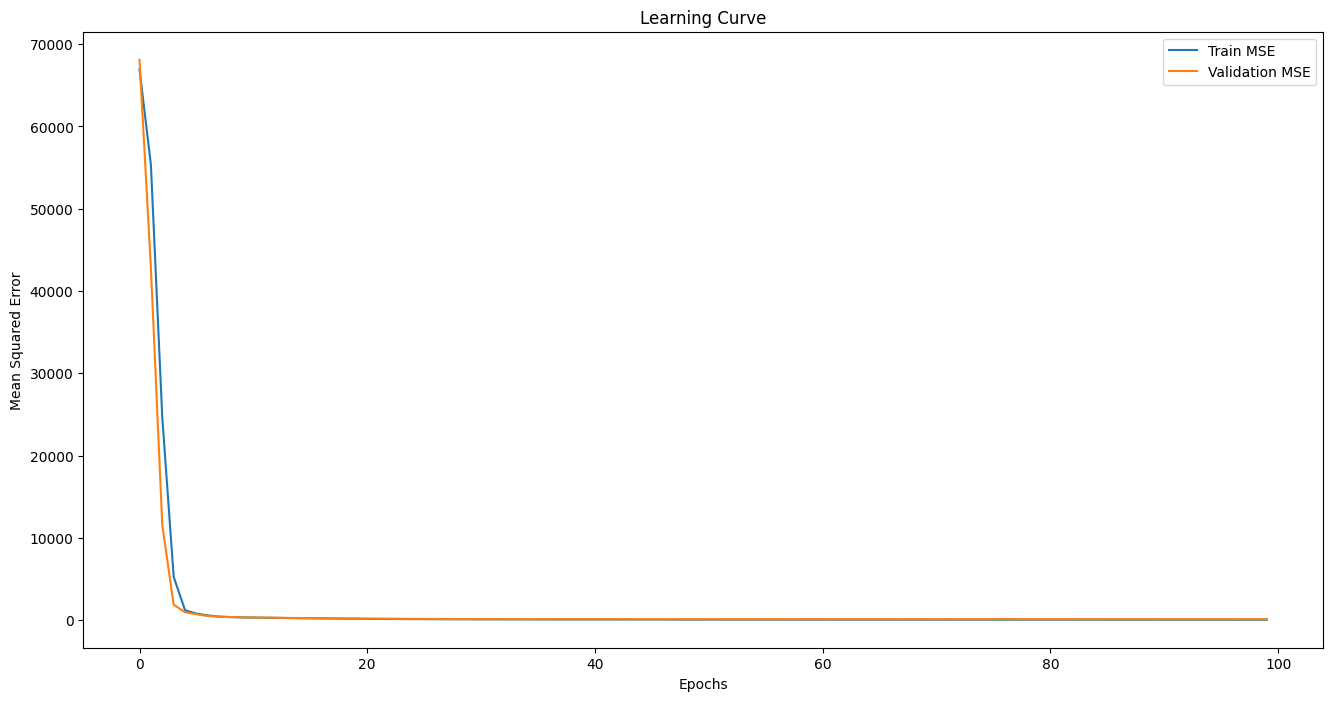

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Train MSE')
plt.plot(hist.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Evaluate the model 

In [35]:
model.evaluate(xtrain , ytrain)

125/125 [==============================] - 1s 6ms/step - loss: 73.6978 - mae: 6.6192


[73.69782257080078, 6.619217395782471]

In [36]:
model.evaluate(xtest, ytest)

32/32 [==============================] - 0s 4ms/step - loss: 122.8802 - mae: 8.8000


[122.88016510009766, 8.800004005432129]

## Predict train and test 

In [37]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

32/32 [==============================] - 0s 2ms/step


In [38]:
ypred_tr[0:5]

array([[ 415.1041 ],
       [-459.70886],
       [  40.63559],
       [ 112.57736],
       [-212.67342]], dtype=float32)

In [39]:
ytrain.head()

,Y
4227,421.295025
4676,-469.452726
800,42.172815
3671,114.083914
4193,-217.535707


In [40]:
ypred_ts[0:5]

array([[ 300.34872],
       [ -71.24036],
       [-179.17679],
       [ 236.86842],
       [ 182.51022]], dtype=float32)

In [41]:
ytest.head()

,Y
1501,297.782677
2586,-55.418700
2653,-181.896454
1055,210.251382
705,188.412050


## Save r2 score in train and test 

In [42]:
from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain, ypred_tr)
print(f'Training R2 : {tr_r2:.4f}')

Training R2 : 0.9989


In [43]:
ts_r2 = r2_score(ytest, ypred_ts)
print(f'Testing R2 : {ts_r2:.4f}')

Testing R2 : 0.9983


## Save the model for future 

In [44]:
model.save('ExampleRegression.keras')



## Loading the model 

In [45]:
from keras.models import load_model

In [46]:
nn = load_model('ExampleRegression.keras')

In [47]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
